In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
import time
from inpainting import InpaintNNF
import metrics

## Setup

Load the test image and mask that will be used for all studies.

In [ ]:
src_path = '../images/football_sky.jpg'
mask_path = '../images/football_sky_mask.jpg'

src = cv2.imread(src_path)
mask = cv2.imread(mask_path, 0)

print("Test image and mask loaded.")

Test image and mask loaded.


## A. Patch Size Study

Test with patch sizes: 3×3, 5×5, 7×7, 9×9, 11×11. Measure quality (PSNR, SSIM) vs. speed.

In [3]:
patch_sizes = [3, 5, 7, 9, 11]
patch_size_results = []

for ps in patch_sizes:
    print(f"Testing patch size: {ps}x{ps}...")
    start_time = time.time()
    
    inpaint_nnf = InpaintNNF(src, mask, patch_w=ps, max_pm_iters=5)
    inpainted_images = inpaint_nnf.inpaint()
    inpainted_result = inpainted_images[-1]
    
    end_time = time.time()
    
    processing_time = end_time - start_time
    psnr = metrics.calculate_psnr(src, inpainted_result)
    ssim = metrics.calculate_ssim(src, inpainted_result)
    
    patch_size_results.append({
        "patch_size": ps,
        "time": processing_time,
        "psnr": psnr,
        "ssim": ssim
    })
    print(f"  Done in {processing_time:.2f}s, PSNR: {psnr:.2f} dB, SSIM: {ssim:.4f}")

Testing patch size: 3x3...
Level 7 done in 0.03311467170715332 seconds.
Level 6 done in 0.6429898738861084 seconds.
Level 5 done in 3.9911062717437744 seconds.
Level 4 done in 19.227915048599243 seconds.
Level 3 done in 56.576223611831665 seconds.
Level 2 done in 179.8109085559845 seconds.
Level 1 done in 1756.7813136577606 seconds.
  Done in 2020.03s, PSNR: 18.57 dB, SSIM: 0.9420
Testing patch size: 5x5...
Level 7 done in 0.030560016632080078 seconds.
Level 6 done in 0.27895450592041016 seconds.
Level 5 done in 3.0140151977539062 seconds.
Level 4 done in 18.544990062713623 seconds.
Level 3 done in 60.64524030685425 seconds.
Level 2 done in 178.2490632534027 seconds.
Level 1 done in 1479.0744025707245 seconds.
  Done in 1742.38s, PSNR: 18.57 dB, SSIM: 0.9420
Testing patch size: 7x7...
Level 6 done in 0.18063855171203613 seconds.
Level 5 done in 2.0099329948425293 seconds.
Level 4 done in 14.130292177200317 seconds.
Level 3 done in 51.93911123275757 seconds.
Level 2 done in 183.24062776

### Plot Patch Size Study Results

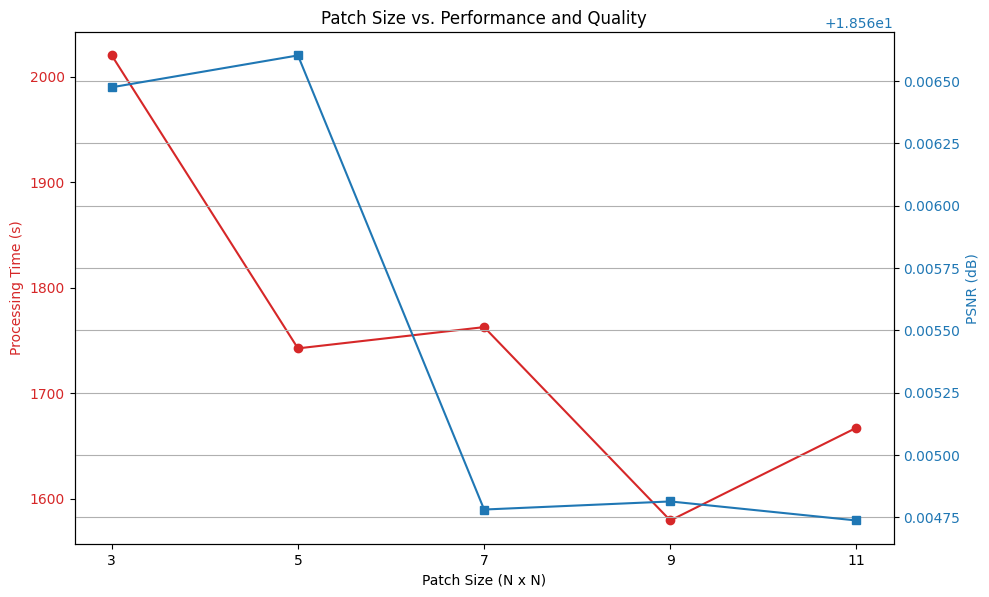

In [4]:
ps_values = [r['patch_size'] for r in patch_size_results]
ps_times = [r['time'] for r in patch_size_results]
ps_psnrs = [r['psnr'] for r in patch_size_results]

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Patch Size (N x N)')
ax1.set_ylabel('Processing Time (s)', color=color)
ax1.plot(ps_values, ps_times, color=color, marker='o', label='Time')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('PSNR (dB)', color=color)
ax2.plot(ps_values, ps_psnrs, color=color, marker='s', label='PSNR')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Patch Size vs. Performance and Quality')
plt.xticks(ps_values)
plt.grid(True)
plt.show()

## B. Iteration Count Study

Test with iteration counts: 1, 2, 3, 4, 5, 7, 10. Measure quality improvement per iteration.

In [5]:
iteration_counts = [1, 2, 3, 4, 5, 7, 10]
iteration_results = []

for ic in iteration_counts:
    print(f"Testing iteration count: {ic}...")
    start_time = time.time()
    
    inpaint_nnf = InpaintNNF(src, mask, patch_w=7, max_pm_iters=ic)
    inpainted_images = inpaint_nnf.inpaint()
    inpainted_result = inpainted_images[-1]
    
    end_time = time.time()
    
    processing_time = end_time - start_time
    psnr = metrics.calculate_psnr(src, inpainted_result)
    ssim = metrics.calculate_ssim(src, inpainted_result)
    
    iteration_results.append({
        "iterations": ic,
        "time": processing_time,
        "psnr": psnr,
        "ssim": ssim
    })
    print(f"  Done in {processing_time:.2f}s, PSNR: {psnr:.2f} dB, SSIM: {ssim:.4f}")

Testing iteration count: 1...
Level 6 done in 0.05494499206542969 seconds.
Level 6 done in 0.05494499206542969 seconds.
Level 5 done in 0.4968752861022949 seconds.
Level 5 done in 0.4968752861022949 seconds.
Level 4 done in 3.377955913543701 seconds.
Level 4 done in 3.377955913543701 seconds.
Level 3 done in 15.531193017959595 seconds.
Level 3 done in 15.531193017959595 seconds.
Level 2 done in 94.6402063369751 seconds.
Level 2 done in 94.6402063369751 seconds.
Level 1 done in 1459.4084734916687 seconds.
  Done in 1576.09s, PSNR: 18.56 dB, SSIM: 0.9419
Testing iteration count: 2...
Level 1 done in 1459.4084734916687 seconds.
  Done in 1576.09s, PSNR: 18.56 dB, SSIM: 0.9419
Testing iteration count: 2...
Level 6 done in 0.0840609073638916 seconds.
Level 6 done in 0.0840609073638916 seconds.
Level 5 done in 0.879387617111206 seconds.
Level 5 done in 0.879387617111206 seconds.
Level 4 done in 5.855585813522339 seconds.
Level 4 done in 5.855585813522339 seconds.
Level 3 done in 26.713355779

### Plot Iteration Count Study Results

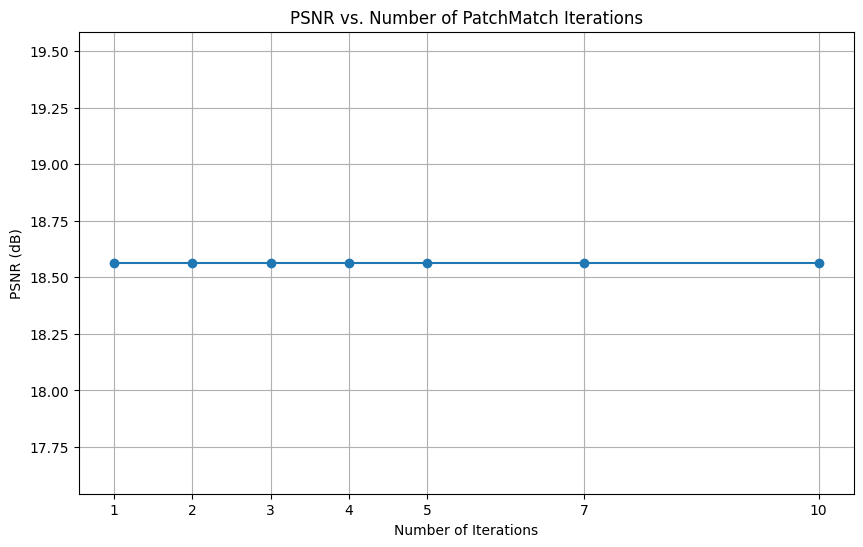

In [6]:
ic_values = [r['iterations'] for r in iteration_results]
ic_psnrs = [r['psnr'] for r in iteration_results]

plt.figure(figsize=(10, 6))
plt.plot(ic_values, ic_psnrs, marker='o')
plt.title('PSNR vs. Number of PatchMatch Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('PSNR (dB)')
plt.xticks(iteration_counts)
plt.grid(True)
plt.show()